In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [384]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("ntb.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  381 non-null    datetime64[ns]
 1   Tn       377 non-null    float64       
 2   Tx       378 non-null    float64       
 3   Tavg     372 non-null    float64       
 4   RH_avg   372 non-null    float64       
 5   RR       373 non-null    float64       
 6   ss       374 non-null    float64       
 7   ff_x     378 non-null    float64       
 8   ddd_x    378 non-null    float64       
 9   ff_avg   378 non-null    float64       
 10  ddd_car  378 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 32.9+ KB


<ipython-input-384-b1d0be416443>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [385]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,25.2,29.6,7.3,27.4
1,2023-02-01,24.8,30.0,16.6,26.3
2,2023-03-01,23.6,31.2,12.2,26.0
3,2023-04-01,23.8,33.8,2.6,27.7
4,2023-05-01,24.4,33.6,2.6,28.5
...,...,...,...,...,...
376,2023-12-16,27.1,33.0,0.0,29.6
377,2023-12-17,27.0,33.2,0.0,29.0
378,2023-12-18,25.4,33.2,0.0,29.6
379,2023-12-19,26.8,33.4,0.0,29.3


In [386]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

53

In [387]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [388]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [389]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,25.2,29.6,7.3,27.4
1,31,31,2023-01-02,23.6,30.0,17.7,26.0
2,59,60,2023-01-03,24.6,31.0,0.0,26.1
3,90,92,2023-01-04,23.0,32.0,0.4,26.2
4,120,123,2023-01-05,23.0,33.1,0.0,27.1
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,24.9,33.0,0.0,30.7
350,350,377,2023-12-17,27.0,33.2,0.0,29.0
351,351,378,2023-12-18,25.4,33.2,0.0,29.6
352,352,379,2023-12-19,26.8,33.4,0.0,29.3


In [390]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         4
Tx         3
RR         8
Tavg       9
dtype: int64

In [391]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       3
dtype: int64

In [392]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

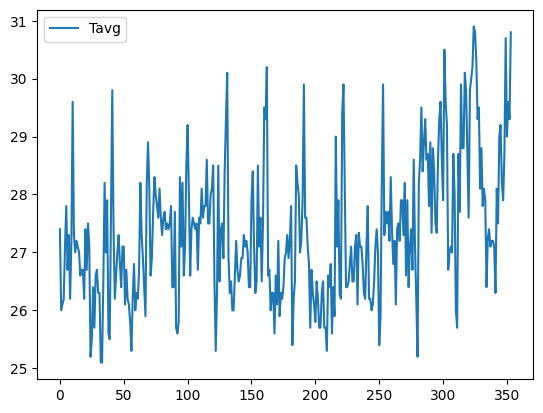

In [393]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

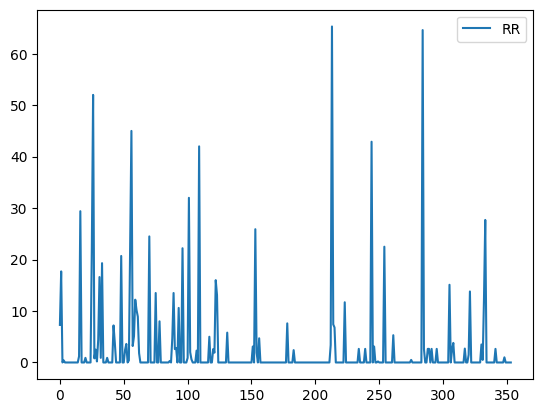

In [394]:
#plotting tavg
df1[['RR']].plot()

In [395]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,25.2,29.6,7.3,27.4,30.0,26.0,17.7
1,31,31,2023-01-02,23.6,30.0,17.7,26.0,31.0,26.1,0.0
2,59,60,2023-01-03,24.6,31.0,0.0,26.1,32.0,26.2,0.4
3,90,92,2023-01-04,23.0,32.0,0.4,26.2,33.1,27.1,0.0
4,120,123,2023-01-05,23.0,33.1,0.0,27.1,34.0,27.8,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,24.9,33.0,0.0,30.7,33.2,29.0,0.0
350,350,377,2023-12-17,27.0,33.2,0.0,29.0,33.2,29.6,0.0
351,351,378,2023-12-18,25.4,33.2,0.0,29.6,33.4,29.3,0.0
352,352,379,2023-12-19,26.8,33.4,0.0,29.3,33.6,30.8,0.0


In [396]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,7.3,27.4,26.0,17.7
1,17.7,26.0,26.1,0.0
2,0.0,26.1,26.2,0.4
3,0.4,26.2,27.1,0.0
4,0.0,27.1,27.8,0.0
...,...,...,...,...
349,0.0,30.7,29.0,0.0
350,0.0,29.0,29.6,0.0
351,0.0,29.6,29.3,0.0
352,0.0,29.3,30.8,0.0


In [397]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,7.3,27.4,26.0,17.7
1,17.7,26.0,26.1,0.0
2,0.0,26.1,26.2,0.4
3,0.4,26.2,27.1,0.0
4,0.0,27.1,27.8,0.0
...,...,...,...,...
348,1.0,28.7,30.7,0.0
349,0.0,30.7,29.0,0.0
350,0.0,29.0,29.6,0.0
351,0.0,29.6,29.3,0.0


In [398]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [399]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,7.3,27.4,26.0,17.7,0
1,17.7,26.0,26.1,0.0,1
2,0.0,26.1,26.2,0.4,2
3,0.4,26.2,27.1,0.0,3
4,0.0,27.1,27.8,0.0,4
...,...,...,...,...,...
348,1.0,28.7,30.7,0.0,348
349,0.0,30.7,29.0,0.0,349
350,0.0,29.0,29.6,0.0,350
351,0.0,29.6,29.3,0.0,351


In [400]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [401]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [402]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [403]:
X_test

,Indeks,Tavg
282,282,28.6
283,283,29.5
284,284,28.4
285,285,28.9
286,286,29.3
...,...,...
348,348,28.7
349,349,30.7
350,350,29.0
351,351,29.6


In [404]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.77924928, 28.17132741, 27.69301236, 27.91101186, 28.08549169,
       27.78125528, 27.82517614, 27.43390042, 27.91301786, 27.23415282,
       27.8703006 , 27.69662317, 27.30534744, 27.23575763, 27.78486609,
       28.0899049 , 28.22086508, 27.78606969, 27.48183328, 28.6137456 ,
       28.22246988, 28.04879245, 26.96120218, 27.09216236, 27.13608322,
       27.09296476, 27.83320016, 27.52896375, 26.65897178, 26.528814  ,
       27.83480496, 27.40000958, 28.35784326, 27.87952822, 27.87992942,
       28.44608618, 28.31592841, 27.83761337, 27.35929832, 28.31713201,
       28.40457253, 28.49201305, 28.79705186, 28.7539334 , 28.53673631,
       28.10194092, 28.18938144, 27.58050742, 27.88554623, 27.45075085,
       27.58171102, 27.49507291, 26.84267923, 27.21299753, 27.27867822,
       27.14852044, 27.1924413 , 27.1928425 , 27.14972405, 26.80196798,
       27.58572303, 27.32500628, 27.97820236, 28.06564288, 27.63084749,
       27.50068972, 27.84924819, 28.72004256, 27.98060957, 28.24

In [405]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9864808779577481 1.6157985679916327


In [406]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,28.6
283,283,29.5
284,284,28.4
285,285,28.9
286,286,29.3
...,...,...
348,348,28.7
349,349,30.7
350,350,29.0
351,351,29.6


In [407]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.779249
283,28.171327
284,27.693012
285,27.911012
286,28.085492
...,...
348,27.849248
349,28.720043
350,27.980610


In [408]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-408-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.4,NaN
1,26.0,NaN
2,26.1,NaN
3,26.2,NaN
4,27.1,NaN
...,...,...
348,28.7,27.849248
349,30.7,28.720043
350,29.0,27.980610
351,29.6,28.242129


<Axes: >

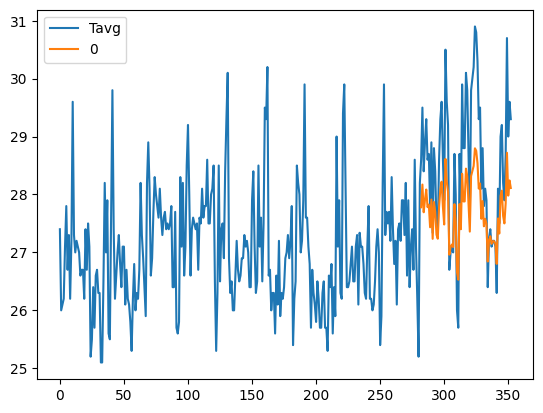

In [409]:
kan.plot()

In [410]:
new_data = [[354, 29.3],[355,29.3],[356,29.3],[357,29.3],[358,29.3],[359,29.3],[360,29.3]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.11277334, 28.11317454, 28.11357575, 28.11397695, 28.11437815,
       28.11477935, 28.11518055])

In [413]:
kan.to_json('Prediksi NTB.json')